# Denoising Autoencoders in PyTorch

The `16_denoising_autoencoders` notebook introduces the concept of denoising autoencoders, a variation of autoencoders designed to remove noise from input data. 

In this notebook, the focus is on preparing datasets with added noise, building the Encoder and Decoder models, and combining them to create a Denoising Autoencoder. It also covers training the model, visualizing the denoised outputs, and experimenting with different noise levels to observe how the model handles varying degrees of noise.

## Table of contents

1. [Understanding Denoising autoencoders](#understanding-denoising-autoencoders)
2. [Setting up the environment](#setting-up-the-environment)
3. [Preparing the dataset and adding noise](#preparing-the-dataset-and-adding-noise)
4. [Building the Encoder model](#building-the-encoder-model)
5. [Building the Decoder model](#building-the-decoder-model)
6. [Combining Encoder and Decoder into a Denoising Autoencoder](#combining-encoder-and-decoder-into-a-denoising-autoencoder)
7. [Training the Denoising Autoencoder](#training-the-denoising-autoencoder)
8. [Visualizing denoised outputs](#visualizing-denoised-outputs)
9. [Experimenting with noise levels](#experimenting-with-noise-levels)

## Understanding Denoising autoencoders

Denoising autoencoders (DAEs) are a variant of traditional autoencoders designed to reconstruct clean data from noisy inputs. Unlike standard autoencoders, where the input and output are the same, denoising autoencoders introduce noise to the input during training but aim to recover the original, noise-free data. This forces the model to learn more robust and meaningful features that are resistant to noise, making DAEs particularly useful in real-world applications where data is often imperfect or corrupted.

### **Why denoising autoencoders?**

Denoising autoencoders offer several advantages over traditional autoencoders, especially when dealing with noisy or incomplete data. By learning to reconstruct clean data from noisy input, DAEs are able to:
- **Improve robustness**: The network becomes more resilient to small perturbations or noise in the input data, learning features that generalize well to unseen data.
- **Learn meaningful features**: In the process of denoising, the autoencoder learns more meaningful and robust representations of the data, focusing on the underlying structure rather than memorizing exact details.
- **Enhance data quality**: DAEs can be used to clean or preprocess data in fields such as image processing, speech recognition, and sensor data analysis, where noise is a common issue.

### **Key components of denoising autoencoders**

Denoising autoencoders have the same core structure as traditional autoencoders, consisting of two main components: the encoder and the decoder. However, the key difference lies in the corruption of the input during training.

#### **Encoder**
The encoder in a denoising autoencoder takes the noisy input and compresses it into a lower-dimensional latent representation. The encoder's task is to learn a compressed version of the data that still retains enough information for the decoder to reconstruct the clean version of the input.

#### **Decoder**
The decoder receives the latent representation from the encoder and attempts to reconstruct the original clean data. Unlike traditional autoencoders, where the decoder tries to reproduce the input as it is, the decoder in a DAE must "denoise" the input and recover the original, noise-free version.

### **Noise corruption**

The core idea behind denoising autoencoders is the introduction of noise to the input during training. The noise corruption process can take various forms, such as:
- **Gaussian noise**: Randomly adding small amounts of noise to the input, altering pixel values or features in a subtle way.
- **Salt-and-pepper noise**: Randomly replacing some pixels or features with maximum or minimum values, simulating extreme corruption.
- **Dropout noise**: Randomly dropping or zeroing out some input features, similar to dropout regularization used in neural networks.

By corrupting the input data, the model is forced to learn representations that are invariant to noise. The model must effectively ignore the added noise and focus on the essential structure of the data to successfully reconstruct the original clean input.

### **Training process**

During training, the denoising autoencoder is presented with pairs of noisy inputs and clean targets. The noisy input is passed through the encoder and then reconstructed by the decoder. The network is trained to minimize the difference between the reconstructed clean output and the original clean input, despite the input being noisy.

This forces the model to learn how to filter out irrelevant noise and capture the true underlying features of the data. As a result, the network becomes more robust, both in terms of its learned representations and its ability to generalize to new, unseen data.

### **Advantages of denoising autoencoders**

Denoising autoencoders offer several key benefits:

- **Noise resilience**: DAEs are more resilient to noise and small perturbations in the input data. This is particularly useful in domains where data is prone to noise, such as image or audio processing.
- **Feature learning**: By learning to denoise, DAEs focus on capturing the underlying structure of the data, making them better at extracting meaningful and robust features.
- **Preprocessing tool**: DAEs can serve as an effective tool for cleaning data, improving the quality of input for downstream tasks such as classification, segmentation, or clustering.
- **Improved generalization**: Since DAEs learn to filter out noise and focus on key features, they tend to generalize better to new data, especially when the new data is slightly noisy or corrupted.

### **Applications of denoising autoencoders**

Denoising autoencoders have a wide range of applications in fields where noisy data is common. Some of the key applications include:

- **Image denoising**: DAEs are widely used in image processing tasks to remove noise from images, enhancing their quality for tasks like object recognition or segmentation.
- **Speech enhancement**: In speech recognition, DAEs can be used to filter out background noise from audio recordings, improving the clarity and accuracy of speech-to-text systems.
- **Data preprocessing**: DAEs can be employed as a preprocessing step to clean noisy datasets before feeding them into more complex models for tasks like classification or regression.
- **Medical image analysis**: In medical imaging, where data quality can be affected by artifacts or sensor noise, DAEs can be used to denoise images for more accurate diagnoses and analysis.

### **Limitations of denoising autoencoders**

While denoising autoencoders are powerful, they have some limitations:
- **Training complexity**: DAEs can require careful tuning of the noise level during training. Too much noise can make the task too difficult, while too little noise may not encourage the model to learn robust features.
- **Data dependency**: DAEs are trained on specific types of noise, so they may not generalize well to different types of noise that they haven't encountered during training.
- **Overfitting**: If the network is too complex or the training data is limited, DAEs can overfit, particularly if the noise pattern in the training data is not representative of real-world noise.

### **Maths**

#### **Encoder and decoder mappings**

A denoising autoencoder, like a standard autoencoder, consists of an encoder and a decoder. The encoder takes a corrupted version of the input $ \tilde{x} $ and maps it to a latent space representation $ z $, while the decoder reconstructs the original clean input $ x $ from the latent representation. The encoding and decoding functions can be represented as:

- **Encoder**: The encoder maps the noisy input $ \tilde{x} $ to the latent representation $ z $:

  $$
  z = f(\tilde{x}) = \sigma(W_{\text{enc}} \tilde{x} + b_{\text{enc}})
  $$

  Where $ W_{\text{enc}} $ is the weight matrix, $ b_{\text{enc}} $ is the bias term, and $ \sigma $ is a non-linear activation function (such as ReLU or sigmoid).

- **Decoder**: The decoder takes the latent representation $ z $ and attempts to reconstruct the clean input $ \hat{x} $:

  $$
  \hat{x} = g(z) = \sigma(W_{\text{dec}} z + b_{\text{dec}})
  $$

  Here, $ W_{\text{dec}} $ and $ b_{\text{dec}} $ are the weight matrix and bias of the decoder, and $ \hat{x} $ is the reconstruction of the original clean input $ x $.

#### **Corruption process**

In a denoising autoencoder, the input data is corrupted before being passed to the encoder. The corruption process adds noise to the input $ x $, producing $ \tilde{x} $, the noisy version of the original input. The corruption process can take various forms:
- **Gaussian noise**: Adding random Gaussian noise to each feature of the input.
- **Salt-and-pepper noise**: Replacing random pixels or features with maximum or minimum values.
- **Dropout noise**: Randomly setting some features to zero.

The corrupted input $ \tilde{x} $ is used as the input to the encoder, while the clean input $ x $ serves as the target output during training.

#### **Loss function and reconstruction error**

The primary objective of a denoising autoencoder is to minimize the reconstruction error between the clean input $ x $ and the reconstructed output $ \hat{x} $. A common loss function used for this is **mean squared error (MSE)**, which calculates the average squared difference between the clean input and its reconstruction:

$$
L(x, \hat{x}) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{x}_i)^2
$$

Where:
- $ x_i $ is the original clean input,
- $ \hat{x}_i $ is the corresponding reconstructed output,
- $ n $ is the number of features.

For binary input data, the **binary cross-entropy loss** can also be used, especially in tasks involving image data with pixel values normalized between 0 and 1:

$$
L(x, \hat{x}) = -\sum_{i=1}^{n} \left[ x_i \log(\hat{x}_i) + (1 - x_i) \log(1 - \hat{x}_i) \right]
$$

The goal of the network is to minimize this loss during training, encouraging the model to learn how to map noisy inputs $ \tilde{x} $ to clean outputs $ \hat{x} $.

#### **Gradient updates and backpropagation**

The denoising autoencoder is trained using backpropagation to minimize the reconstruction error. The gradients of the loss function $ L(x, \hat{x}) $ with respect to the encoder and decoder parameters are computed, and the weights are updated accordingly using gradient descent:

$$
W_{\text{new}} = W_{\text{old}} - \eta \frac{\partial L}{\partial W}
$$

Where:
- $ W_{\text{old}} $ is the current weight matrix (either for the encoder or the decoder),
- $ \eta $ is the learning rate,
- $ \frac{\partial L}{\partial W} $ is the gradient of the loss function with respect to the weight matrix $ W $.

Both the encoder and decoder weights are updated during training to minimize the reconstruction loss and improve the model's ability to recover clean data from noisy inputs.

#### **Regularization in denoising autoencoders**

Denoising autoencoders inherently apply a form of regularization by adding noise to the input during training. This noise corruption forces the network to learn robust features that are invariant to minor perturbations in the data. However, additional regularization techniques, such as **L2 regularization** or **dropout**, can be applied to further enhance the model’s generalization abilities.

- **L2 regularization** (also known as weight decay) adds a penalty proportional to the sum of the squares of the weights to the loss function:

  $$
  L_{\text{regularized}} = L(x, \hat{x}) + \lambda \sum W^2
  $$

  Where $ \lambda $ is a regularization parameter that controls the strength of the weight penalty.

- **Dropout** involves randomly deactivating neurons during training, which prevents the network from becoming overly reliant on any particular neuron and encourages the learning of more distributed representations.

#### **Latent space and feature learning**

The encoder compresses the noisy input $ \tilde{x} $ into a lower-dimensional latent representation $ z $. This latent space is designed to capture the most important features of the input, even in the presence of noise. The decoder then attempts to reconstruct the original input $ x $ from this latent representation.

The size of the latent space, or the number of neurons in the bottleneck layer, controls the degree of compression. A smaller latent space forces the model to focus on the most important features, while a larger latent space allows the network to capture more detail but may risk overfitting.

#### **Applications of reconstruction error**

In denoising autoencoders, the reconstruction error $ L(x, \hat{x}) $ can be used as a measure of how well the model is performing. A low reconstruction error indicates that the model is effectively denoising the input, while a high reconstruction error may indicate that the input data contains patterns or features that the model hasn’t learned to recover accurately.

Reconstruction error can also be applied in anomaly detection tasks. When the model is trained on normal data, it learns to reconstruct the typical patterns of that data. When presented with anomalous data, the model struggles to reconstruct it, leading to higher reconstruction error, which signals an anomaly.

## Setting up the environment


##### **Q1: How do you install the necessary libraries for building and training a denoising autoencoder in PyTorch?**


In [35]:
# !pip install torch torchvision

##### **Q2: How do you import the required modules for data loading, model building, and noise addition in PyTorch?**


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision

import numpy as np
import matplotlib.pyplot as plt
import random
import os

##### **Q3: How do you set up the environment to use a GPU for training the denoising autoencoder, and how do you fallback to CPU if necessary?**


In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


##### **Q4: How do you set random seeds in PyTorch to ensure reproducibility in denoising autoencoder training?**

In [38]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

## Preparing the dataset and adding noise


##### **Q5: How do you load a dataset like MNIST or CIFAR-10 using `torchvision.datasets` in PyTorch?**


In [67]:
from torchvision.datasets import Caltech256

data_root = './data'
caltech_data = Caltech256(root=data_root, download=True)

Downloading...
From (original): https://drive.google.com/uc?id=1r6o0pSROcV1_VwT4oSjA2FBUSCWGuxLK
From (redirected): https://drive.usercontent.google.com/download?id=1r6o0pSROcV1_VwT4oSjA2FBUSCWGuxLK&confirm=t&uuid=8097a159-4c4f-4326-8930-33efb14942ae
To: /home/fellmir/git/pyTorchBasis/01-intermediate-projects/data/caltech256/256_ObjectCategories.tar
100%|██████████| 1.18G/1.18G [01:00<00:00, 19.5MB/s]


Extracting ./data/caltech256/256_ObjectCategories.tar to ./data/caltech256


##### **Q6: How do you apply transformations such as normalization to the dataset to prepare it for training?**


In [68]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Reduced size to 64x64 to save memory
    transforms.Lambda(lambda image: image.convert('RGB')),  # Ensure all images are RGB
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize the images
])

dataset = Caltech256(root=data_root, transform=transform, download=True)

Files already downloaded and verified


##### **Q7: How do you add Gaussian noise to the dataset, and how do you ensure that it doesn't exceed a certain noise level?**


In [69]:
class NoisyDataset(Dataset):
    def __init__(self, dataset, noise_factor=0.5):
        self.dataset = dataset
        self.noise_factor = noise_factor

    def __getitem__(self, index):
        clean_img, _ = self.dataset[index]
        noisy_img = clean_img + self.noise_factor * torch.randn_like(clean_img)
        noisy_img = torch.clamp(noisy_img, 0., 1.)
        return noisy_img, clean_img

    def __len__(self):
        return len(self.dataset)

##### **Q8: How do you create DataLoaders in PyTorch to handle both the noisy input data and the clean target data?**

In [70]:
batch_size = 16
noisy_dataset = NoisyDataset(dataset, noise_factor=0.5)
train_size = int(0.8 * len(noisy_dataset))
val_size = len(noisy_dataset) - train_size
train_dataset, val_dataset = random_split(noisy_dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

## Building the Encoder model


##### **Q9: How do you define the architecture of the Encoder model using PyTorch’s `nn.Module`?**


In [43]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output: 32 x 32 x 32
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output: 64 x 16 x 16
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output: 128 x 8 x 8
        )
        
    def forward(self, x):
        x = self.encoder(x)
        return x

##### **Q10: How do you implement the forward pass of the Encoder to map noisy inputs into a latent representation?**


In [44]:
# See forward pass above, i.e.,
# def forward(self, x):
#     x = self.encoder(x)
#     return x

##### **Q11: How do you experiment with different numbers of hidden layers in the Encoder and observe the effects on model performance?**

In [45]:
# Modify the Encoder class by adding or removing layers and observe the effects on performance
# For example, to reduce the model size, you might remove the last Conv2d layer:
# class Encoder(nn.Module):
#     def __init__(self):
#         super(Encoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Conv2d(3, 32, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2),  # Output: 32 x 32 x 32
#             nn.Conv2d(32, 64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2),  # Output: 64 x 16 x 16
#             # Removed one Conv2d layer
#         )
        
#     def forward(self, x):
#         x = self.encoder(x)
#         return x

## Building the Decoder model


##### **Q12: How do you define the architecture of the Decoder model using PyTorch’s `nn.Module`?**


In [46]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),  # Output: 64 x 16 x 16
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),   # Output: 32 x 32 x 32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=2, stride=2),    # Output: 3 x 64 x 64
            nn.Sigmoid(),  # Ensure output is in [0,1]
        )
        
    def forward(self, x):
        x = self.decoder(x)
        return x

##### **Q13: How do you implement the forward pass of the Decoder to map the latent representation back to a denoised version of the input?**


In [47]:
# See above, i.e.,
# def forward(self, x):
#     x = self.decoder(x)
#     return x

##### **Q14: How do you apply the appropriate activation function in the Decoder to ensure the output data is in the correct range?**

In [48]:
# See the nn.Sigmoid() activation function applied at the output layer in the Decoder

## Combining Encoder and Decoder into a Denoising Autoencoder


##### **Q15: How do you combine the Encoder and Decoder models into a single denoising autoencoder architecture in PyTorch?**


In [49]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

##### **Q16: How do you implement the forward pass of the denoising autoencoder to take noisy input and produce a clean, denoised output?**


In [50]:
# Implemented in the forward method of the DenoisingAutoencoder class, i.e.,
# def forward(self, x):
#     x = self.encoder(x)
#     x = self.decoder(x)
#     return x

##### **Q17: How do you verify that the input and output dimensions match to ensure the denoising autoencoder reconstructs the data correctly?**

In [51]:
model = DenoisingAutoencoder().to(device)

dataiter = iter(train_dataloader)  # Get a batch of data
noisy_imgs, clean_imgs = next(dataiter)
noisy_imgs = noisy_imgs.to(device)
clean_imgs = clean_imgs.to(device)

outputs = model(noisy_imgs)  # Pass through the model

print('Input shape:', noisy_imgs.shape)
print('Output shape:', outputs.shape)

Input shape: torch.Size([16, 3, 64, 64])
Output shape: torch.Size([16, 3, 64, 64])


## Training the Denoising Autoencoder


##### **Q18: How do you define the loss function (e.g., Mean Squared Error) to measure the difference between the clean and denoised outputs in PyTorch?**


In [52]:
criterion = nn.MSELoss()

##### **Q19: How do you configure an optimizer (e.g., Adam) to update the denoising autoencoder's parameters during training?**


In [53]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

##### **Q20: How do you implement a training loop that performs forward pass, loss calculation, and backpropagation for the denoising autoencoder?**


In [54]:
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for noisy_imgs, clean_imgs in train_dataloader:
        noisy_imgs = noisy_imgs.to(device)
        clean_imgs = clean_imgs.to(device)

        outputs = model(noisy_imgs)
        loss = criterion(outputs, clean_imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * noisy_imgs.size(0)

    epoch_loss = running_loss / len(train_dataloader.dataset)
    train_losses.append(epoch_loss)

    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for noisy_imgs, clean_imgs in val_dataloader:
            noisy_imgs = noisy_imgs.to(device)
            clean_imgs = clean_imgs.to(device)

            outputs = model(noisy_imgs)
            loss = criterion(outputs, clean_imgs)
            val_running_loss += loss.item() * noisy_imgs.size(0)

    val_epoch_loss = val_running_loss / len(val_dataloader.dataset)
    val_losses.append(val_epoch_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}')

Epoch [1/10], Train Loss: 0.1879, Val Loss: 0.1692
Epoch [2/10], Train Loss: 0.1718, Val Loss: 0.1661
Epoch [3/10], Train Loss: 0.1698, Val Loss: 0.1652
Epoch [4/10], Train Loss: 0.1689, Val Loss: 0.1645
Epoch [5/10], Train Loss: 0.1683, Val Loss: 0.1646
Epoch [6/10], Train Loss: 0.1680, Val Loss: 0.1637
Epoch [7/10], Train Loss: 0.1677, Val Loss: 0.1636
Epoch [8/10], Train Loss: 0.1675, Val Loss: 0.1633
Epoch [9/10], Train Loss: 0.1673, Val Loss: 0.1630
Epoch [10/10], Train Loss: 0.1671, Val Loss: 0.1636


##### **Q21: How do you monitor and log the training loss over epochs to ensure the model is learning to denoise effectively?**

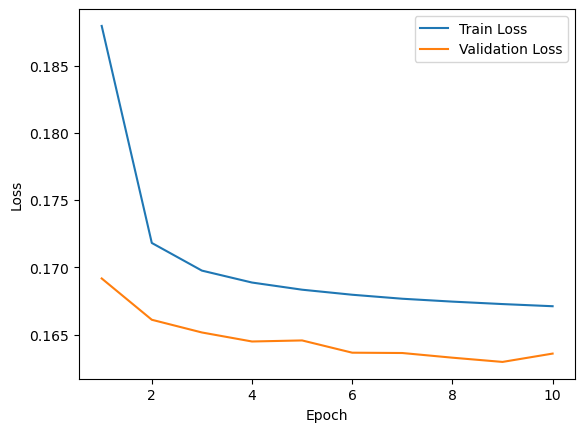

In [55]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Visualizing denoised outputs


##### **Q22: How do you visualize the noisy input, clean target, and denoised output side by side to observe the model’s performance?**


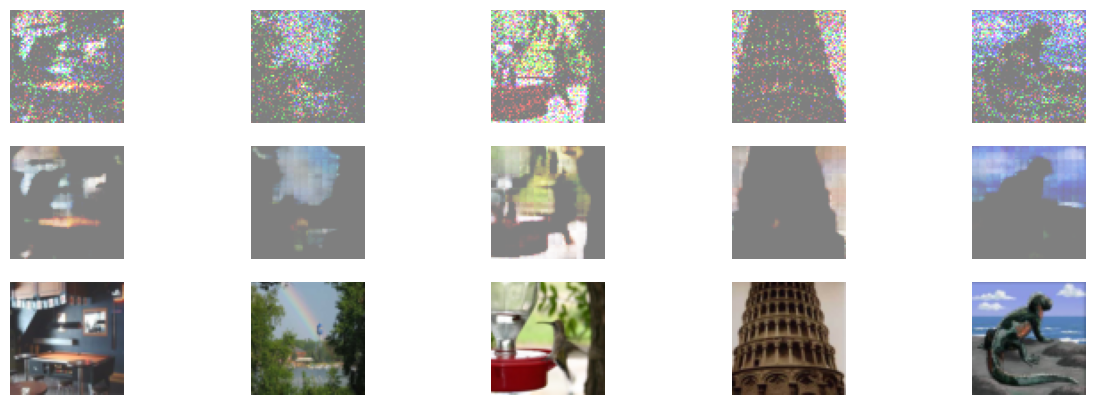

In [56]:
def imshow(img):
    img = img.cpu().numpy()
    img = np.transpose(img, (1, 2, 0))  # Convert from C x H x W to H x W x C
    img = (img * 0.5) + 0.5  # Unnormalize if images were normalized
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')

dataiter = iter(val_dataloader)
noisy_imgs, clean_imgs = next(dataiter)
noisy_imgs = noisy_imgs.to(device)
clean_imgs = clean_imgs.to(device)

model.eval()
with torch.no_grad():
    outputs = model(noisy_imgs)

# Visualize the images
num_imgs = 5
plt.figure(figsize=(15, 5))
for idx in range(num_imgs):
    plt.subplot(3, num_imgs, idx + 1)
    imshow(noisy_imgs[idx])
    if idx == 0:
        plt.ylabel('Noisy Input', fontsize=12)
    
    plt.subplot(3, num_imgs, idx + 1 + num_imgs)
    imshow(outputs[idx])
    if idx == 0:
        plt.ylabel('Denoised Output', fontsize=12)
    
    plt.subplot(3, num_imgs, idx + 1 + 2 * num_imgs)
    imshow(clean_imgs[idx])
    if idx == 0:
        plt.ylabel('Clean Target', fontsize=12)

plt.show()

##### **Q23: How do you save and display the denoised images from the validation set after each training epoch?**

In [57]:
from torchvision.utils import save_image

# To include within the training loop:
model.eval()
with torch.no_grad():
    dataiter = iter(val_dataloader)
    noisy_imgs, clean_imgs = next(dataiter)
    noisy_imgs = noisy_imgs.to(device)
    clean_imgs = clean_imgs.to(device)

    outputs = model(noisy_imgs)

    save_image(noisy_imgs, f'noisy_epoch_{epoch + 1}.png')
    save_image(outputs, f'denoised_epoch_{epoch + 1}.png')
    save_image(clean_imgs, f'clean_epoch_{epoch + 1}.png')

    print(f'Saved denoised images for epoch {epoch + 1}')

Saved denoised images for epoch 10


## Experimenting with noise levels


##### **Q24: How do you experiment with different levels of Gaussian noise and observe how the autoencoder's performance changes?**



Training with noise factor: 0.1
Epoch [1/10], Train Loss: 0.1893, Val Loss: 0.1715
Epoch [2/10], Train Loss: 0.1693, Val Loss: 0.1679
Epoch [3/10], Train Loss: 0.1665, Val Loss: 0.1660
Epoch [4/10], Train Loss: 0.1651, Val Loss: 0.1652
Epoch [5/10], Train Loss: 0.1644, Val Loss: 0.1647
Epoch [6/10], Train Loss: 0.1640, Val Loss: 0.1642
Epoch [7/10], Train Loss: 0.1636, Val Loss: 0.1641
Epoch [8/10], Train Loss: 0.1634, Val Loss: 0.1635
Epoch [9/10], Train Loss: 0.1632, Val Loss: 0.1633
Epoch [10/10], Train Loss: 0.1630, Val Loss: 0.1633


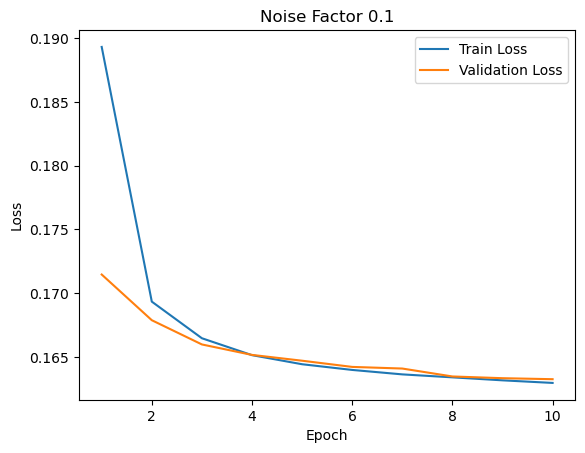

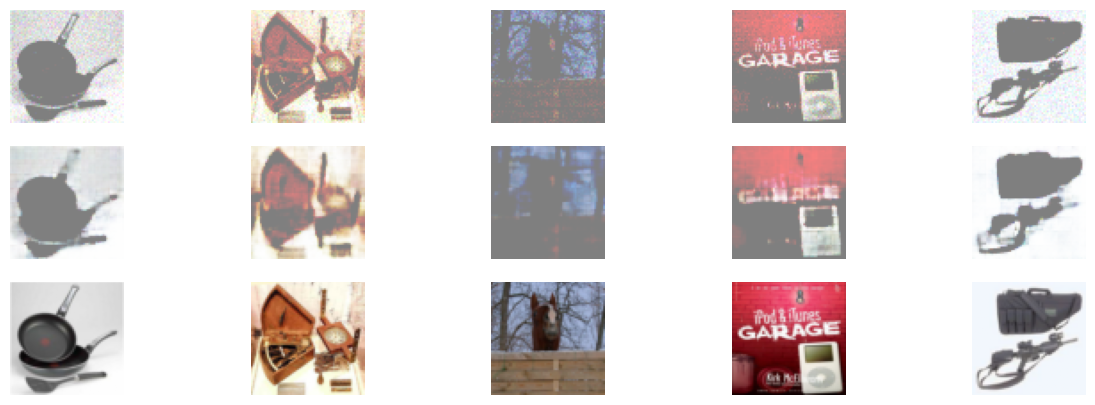


Training with noise factor: 0.3
Epoch [1/10], Train Loss: 0.1858, Val Loss: 0.1721
Epoch [2/10], Train Loss: 0.1683, Val Loss: 0.1695
Epoch [3/10], Train Loss: 0.1664, Val Loss: 0.1680
Epoch [4/10], Train Loss: 0.1655, Val Loss: 0.1673
Epoch [5/10], Train Loss: 0.1649, Val Loss: 0.1667
Epoch [6/10], Train Loss: 0.1645, Val Loss: 0.1663
Epoch [7/10], Train Loss: 0.1642, Val Loss: 0.1661
Epoch [8/10], Train Loss: 0.1640, Val Loss: 0.1659
Epoch [9/10], Train Loss: 0.1638, Val Loss: 0.1657
Epoch [10/10], Train Loss: 0.1637, Val Loss: 0.1657


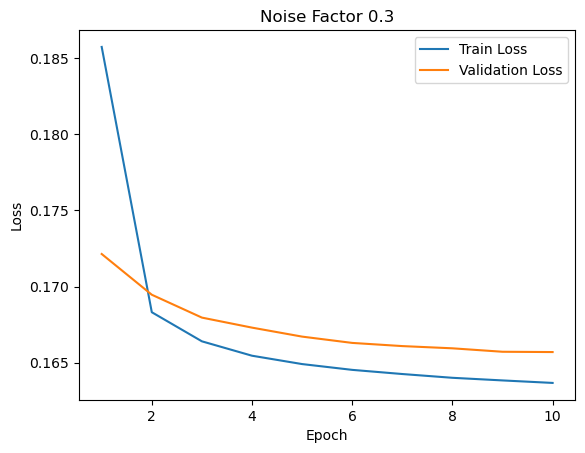

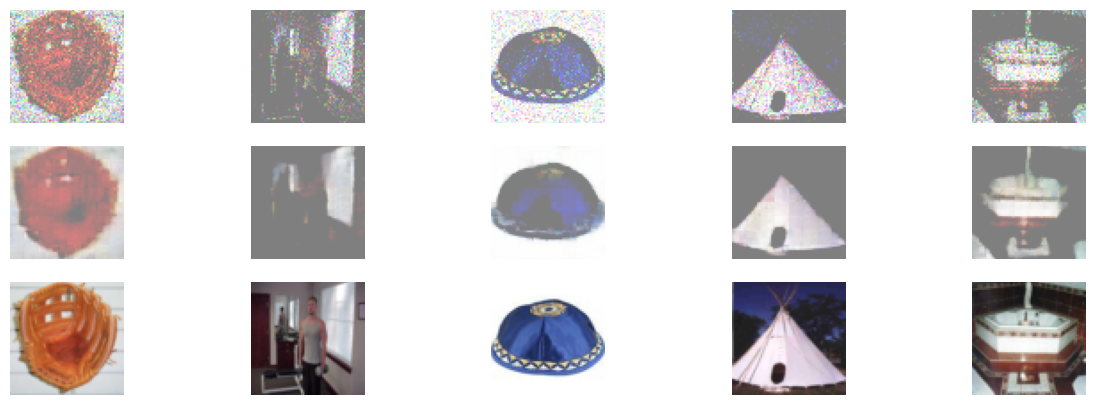


Training with noise factor: 0.7
Epoch [1/10], Train Loss: 0.1942, Val Loss: 0.1763
Epoch [2/10], Train Loss: 0.1731, Val Loss: 0.1735
Epoch [3/10], Train Loss: 0.1712, Val Loss: 0.1720
Epoch [4/10], Train Loss: 0.1703, Val Loss: 0.1715
Epoch [5/10], Train Loss: 0.1697, Val Loss: 0.1712
Epoch [6/10], Train Loss: 0.1693, Val Loss: 0.1707
Epoch [7/10], Train Loss: 0.1691, Val Loss: 0.1705
Epoch [8/10], Train Loss: 0.1688, Val Loss: 0.1706
Epoch [9/10], Train Loss: 0.1687, Val Loss: 0.1701
Epoch [10/10], Train Loss: 0.1685, Val Loss: 0.1700


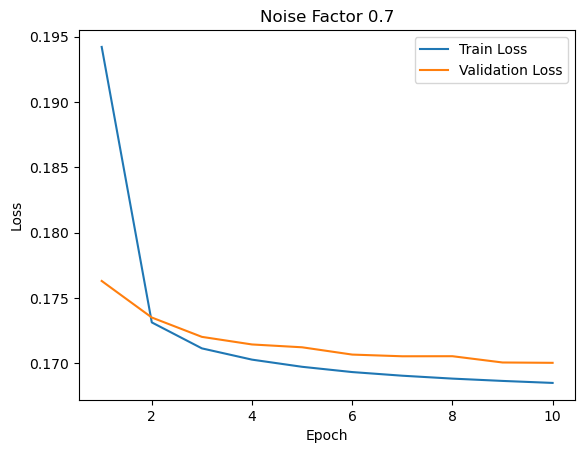

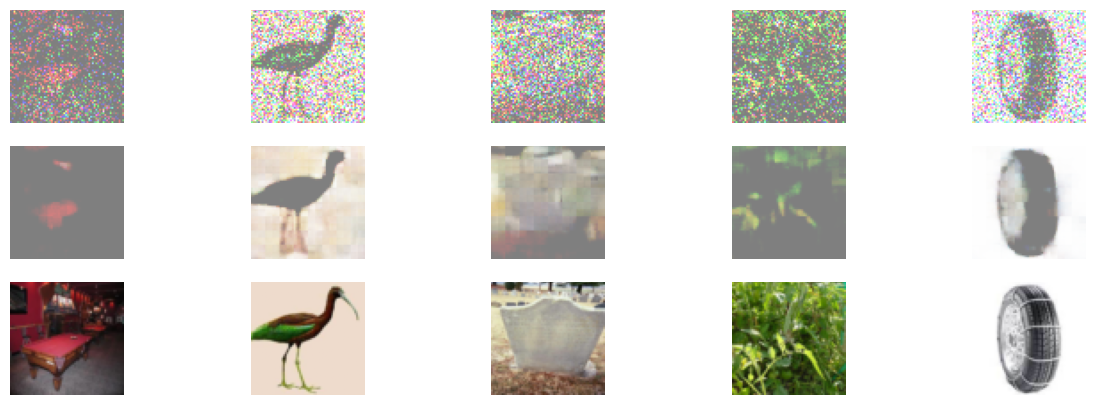

In [61]:
num_epochs = 10
noise_levels = [0.1, 0.3, 0.7]

results = {}

for noise_factor in noise_levels:
    print(f'\nTraining with noise factor: {noise_factor}')
    
    noisy_dataset = NoisyDataset(dataset, noise_factor=noise_factor)
    
    train_size = int(0.8 * len(noisy_dataset))
    val_size = len(noisy_dataset) - train_size
    train_dataset, val_dataset = random_split(noisy_dataset, [train_size, val_size])
    
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    model = DenoisingAutoencoder().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for noisy_imgs, clean_imgs in train_dataloader:
            noisy_imgs = noisy_imgs.to(device)
            clean_imgs = clean_imgs.to(device)

            outputs = model(noisy_imgs)
            loss = criterion(outputs, clean_imgs)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * noisy_imgs.size(0)

        epoch_loss = running_loss / len(train_dataloader.dataset)
        train_losses.append(epoch_loss)

        model.eval()
        val_running_loss = 0.0
        with torch.no_grad():
            for noisy_imgs, clean_imgs in val_dataloader:
                noisy_imgs = noisy_imgs.to(device)
                clean_imgs = clean_imgs.to(device)

                outputs = model(noisy_imgs)
                loss = criterion(outputs, clean_imgs)
                val_running_loss += loss.item() * noisy_imgs.size(0)

        val_epoch_loss = val_running_loss / len(val_dataloader.dataset)
        val_losses.append(val_epoch_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}')

    # Store the losses for this noise level:
    results[noise_factor] = {
        'train_loss': train_losses,
        'val_loss': val_losses,
    }

    plt.figure()
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
    plt.title(f'Noise Factor {noise_factor}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    dataiter = iter(val_dataloader)
    noisy_imgs, clean_imgs = next(dataiter)
    noisy_imgs = noisy_imgs.to(device)
    clean_imgs = clean_imgs.to(device)

    with torch.no_grad():
        outputs = model(noisy_imgs)

    num_imgs = 5
    plt.figure(figsize=(15, 5))
    for idx in range(num_imgs):
        plt.subplot(3, num_imgs, idx + 1)
        imshow(noisy_imgs[idx])
        if idx == 0:
            plt.ylabel('Noisy Input', fontsize=12)
        
        plt.subplot(3, num_imgs, idx + 1 + num_imgs)
        imshow(outputs[idx])
        if idx == 0:
            plt.ylabel('Denoised Output', fontsize=12)
        
        plt.subplot(3, num_imgs, idx + 1 + 2 * num_imgs)
        imshow(clean_imgs[idx])
        if idx == 0:
            plt.ylabel('Clean Target', fontsize=12)
    
    plt.show()

##### **Q25: How do you modify the noise type (e.g., from Gaussian to salt-and-pepper noise) and evaluate how well the model performs on different noise types?**


In [62]:
# Update the NoisyDataset class to handle different noise types:
class NoisyDataset(Dataset):
    def __init__(self, dataset, noise_type='gaussian', noise_factor=0.5):
        self.dataset = dataset
        self.noise_type = noise_type
        self.noise_factor = noise_factor

    def __getitem__(self, index):
        clean_img, _ = self.dataset[index]
        if self.noise_type == 'gaussian':
            noisy_img = clean_img + self.noise_factor * torch.randn_like(clean_img)
        elif self.noise_type == 'salt_pepper':
            noisy_img = clean_img.clone()
            prob = self.noise_factor
            rnd = torch.rand_like(clean_img)
            noisy_img[rnd < prob / 2] = 0.0  # Salt noise
            noisy_img[rnd > 1 - prob / 2] = 1.0  # Pepper noise
        else:
            raise ValueError('Unsupported noise type')
        noisy_img = torch.clamp(noisy_img, 0., 1.)
        return noisy_img, clean_img

    def __len__(self):
        return len(self.dataset)


Training with noise type: gaussian
Epoch [1/10], Train Loss: 0.1901, Val Loss: 0.1715
Epoch [2/10], Train Loss: 0.1714, Val Loss: 0.1687
Epoch [3/10], Train Loss: 0.1693, Val Loss: 0.1673
Epoch [4/10], Train Loss: 0.1684, Val Loss: 0.1666
Epoch [5/10], Train Loss: 0.1678, Val Loss: 0.1662
Epoch [6/10], Train Loss: 0.1674, Val Loss: 0.1660
Epoch [7/10], Train Loss: 0.1671, Val Loss: 0.1658
Epoch [8/10], Train Loss: 0.1669, Val Loss: 0.1656
Epoch [9/10], Train Loss: 0.1667, Val Loss: 0.1653
Epoch [10/10], Train Loss: 0.1666, Val Loss: 0.1652


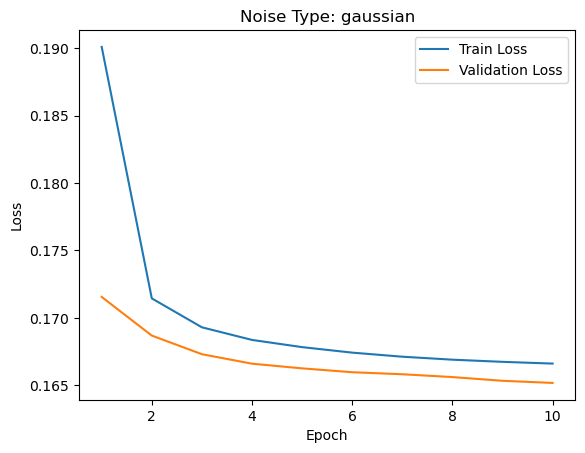

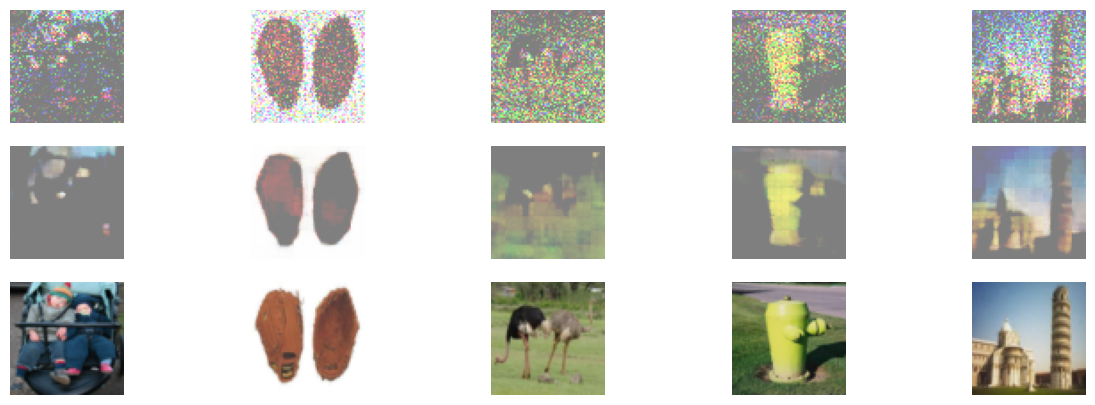


Training with noise type: salt_pepper
Epoch [1/10], Train Loss: 0.1977, Val Loss: 0.1784
Epoch [2/10], Train Loss: 0.1756, Val Loss: 0.1752
Epoch [3/10], Train Loss: 0.1733, Val Loss: 0.1730
Epoch [4/10], Train Loss: 0.1718, Val Loss: 0.1718
Epoch [5/10], Train Loss: 0.1709, Val Loss: 0.1711
Epoch [6/10], Train Loss: 0.1702, Val Loss: 0.1706
Epoch [7/10], Train Loss: 0.1696, Val Loss: 0.1712
Epoch [8/10], Train Loss: 0.1691, Val Loss: 0.1695
Epoch [9/10], Train Loss: 0.1686, Val Loss: 0.1693
Epoch [10/10], Train Loss: 0.1682, Val Loss: 0.1688


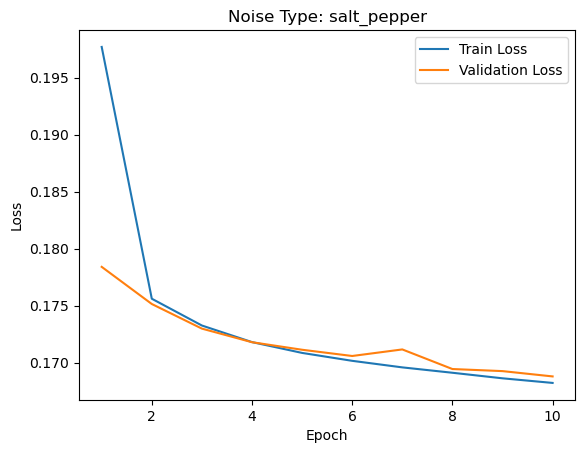

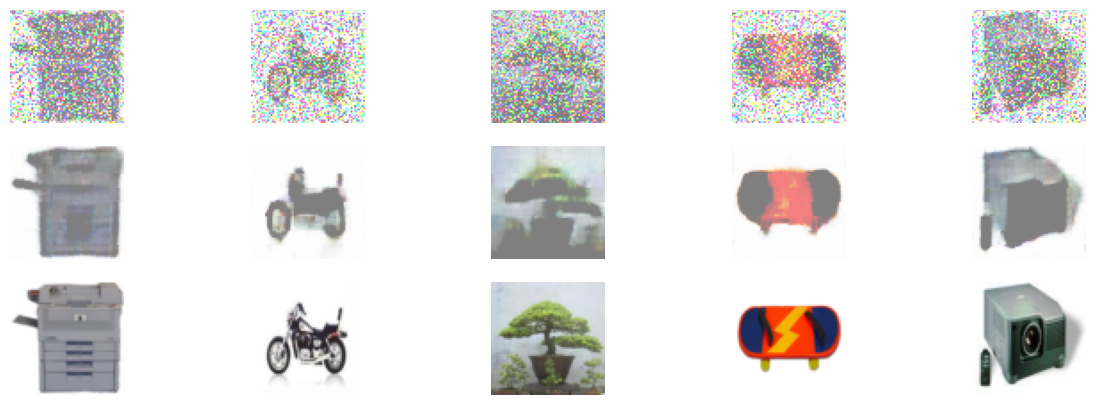

In [63]:
num_epochs = 10
noise_types = ['gaussian', 'salt_pepper']

results_noise_type = {}

for noise_type in noise_types:
    print(f'\nTraining with noise type: {noise_type}')
    
    noisy_dataset = NoisyDataset(dataset, noise_type=noise_type, noise_factor=0.5)
    
    train_size = int(0.8 * len(noisy_dataset))
    val_size = len(noisy_dataset) - train_size
    train_dataset, val_dataset = random_split(noisy_dataset, [train_size, val_size])
    
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    model = DenoisingAutoencoder().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for noisy_imgs, clean_imgs in train_dataloader:
            noisy_imgs = noisy_imgs.to(device)
            clean_imgs = clean_imgs.to(device)

            outputs = model(noisy_imgs)
            loss = criterion(outputs, clean_imgs)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * noisy_imgs.size(0)

        epoch_loss = running_loss / len(train_dataloader.dataset)
        train_losses.append(epoch_loss)

        model.eval()
        val_running_loss = 0.0
        with torch.no_grad():
            for noisy_imgs, clean_imgs in val_dataloader:
                noisy_imgs = noisy_imgs.to(device)
                clean_imgs = clean_imgs.to(device)

                outputs = model(noisy_imgs)
                loss = criterion(outputs, clean_imgs)
                val_running_loss += loss.item() * noisy_imgs.size(0)

        val_epoch_loss = val_running_loss / len(val_dataloader.dataset)
        val_losses.append(val_epoch_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}')

    results_noise_type[noise_type] = {
        'train_loss': train_losses,
        'val_loss': val_losses,
    }

    plt.figure()
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
    plt.title(f'Noise Type: {noise_type}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    dataiter = iter(val_dataloader)
    noisy_imgs, clean_imgs = next(dataiter)
    noisy_imgs = noisy_imgs.to(device)
    clean_imgs = clean_imgs.to(device)

    with torch.no_grad():
        outputs = model(noisy_imgs)

    num_imgs = 5
    plt.figure(figsize=(15, 5))
    for idx in range(num_imgs):
        plt.subplot(3, num_imgs, idx + 1)
        imshow(noisy_imgs[idx])
        if idx == 0:
            plt.ylabel('Noisy Input', fontsize=12)
        
        plt.subplot(3, num_imgs, idx + 1 + num_imgs)
        imshow(outputs[idx])
        if idx == 0:
            plt.ylabel('Denoised Output', fontsize=12)
        
        plt.subplot(3, num_imgs, idx + 1 + 2 * num_imgs)
        imshow(clean_imgs[idx])
        if idx == 0:
            plt.ylabel('Clean Target', fontsize=12)
    
    plt.show()

##### **Q26: How do you measure and compare the denoising autoencoder’s performance when trained on light versus heavy noise?**


Training with noise factor: 0.1
Epoch [1/10], Train Loss: 0.1846, Val Loss: 0.1700
Epoch [2/10], Train Loss: 0.1678, Val Loss: 0.1666
Epoch [3/10], Train Loss: 0.1656, Val Loss: 0.1654
Epoch [4/10], Train Loss: 0.1646, Val Loss: 0.1646
Epoch [5/10], Train Loss: 0.1640, Val Loss: 0.1640
Epoch [6/10], Train Loss: 0.1635, Val Loss: 0.1638
Epoch [7/10], Train Loss: 0.1632, Val Loss: 0.1633
Epoch [8/10], Train Loss: 0.1629, Val Loss: 0.1630
Epoch [9/10], Train Loss: 0.1627, Val Loss: 0.1628
Epoch [10/10], Train Loss: 0.1625, Val Loss: 0.1629
Average PSNR for noise factor 0.1: 9.85 dB


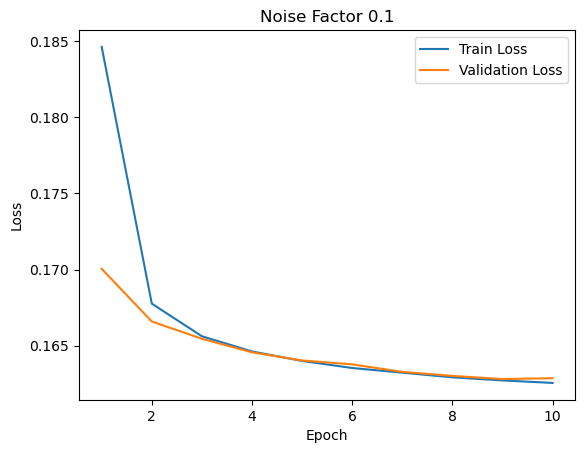

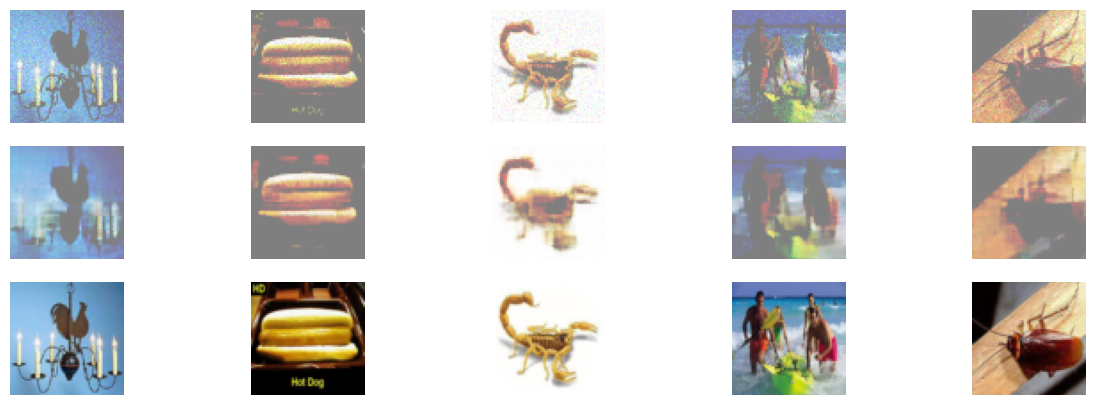


Training with noise factor: 0.9
Epoch [1/10], Train Loss: 0.2465, Val Loss: 0.1797
Epoch [2/10], Train Loss: 0.1771, Val Loss: 0.1765
Epoch [3/10], Train Loss: 0.1748, Val Loss: 0.1749
Epoch [4/10], Train Loss: 0.1736, Val Loss: 0.1741
Epoch [5/10], Train Loss: 0.1730, Val Loss: 0.1735
Epoch [6/10], Train Loss: 0.1726, Val Loss: 0.1731
Epoch [7/10], Train Loss: 0.1722, Val Loss: 0.1735
Epoch [8/10], Train Loss: 0.1720, Val Loss: 0.1726
Epoch [9/10], Train Loss: 0.1718, Val Loss: 0.1724
Epoch [10/10], Train Loss: 0.1716, Val Loss: 0.1722
Average PSNR for noise factor 0.9: 9.18 dB


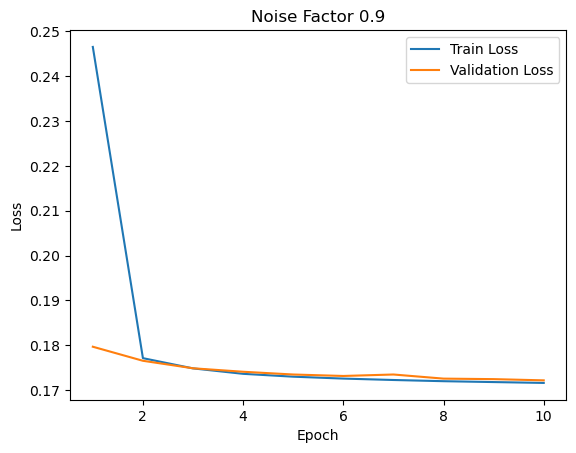

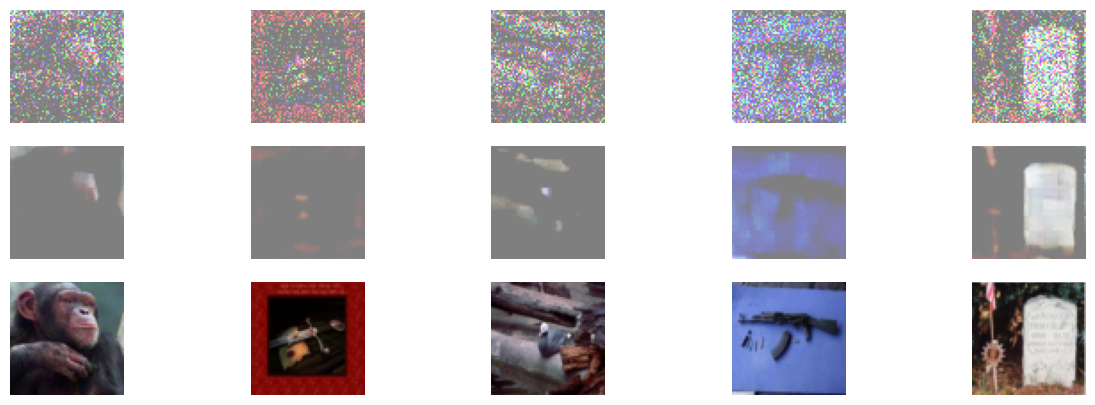

In [71]:
noise_levels = [0.1, 0.9]

psnr_results = {}

for noise_factor in noise_levels:
    print(f'\nTraining with noise factor: {noise_factor}')
    
    noisy_dataset = NoisyDataset(dataset, noise_factor=noise_factor)
    
    train_size = int(0.8 * len(noisy_dataset))
    val_size = len(noisy_dataset) - train_size
    train_dataset, val_dataset = random_split(noisy_dataset, [train_size, val_size])
    
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    model = DenoisingAutoencoder().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for noisy_imgs, clean_imgs in train_dataloader:
            noisy_imgs = noisy_imgs.to(device)
            clean_imgs = clean_imgs.to(device)

            outputs = model(noisy_imgs)
            loss = criterion(outputs, clean_imgs)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * noisy_imgs.size(0)

        epoch_loss = running_loss / len(train_dataloader.dataset)
        train_losses.append(epoch_loss)

        model.eval()
        val_running_loss = 0.0
        with torch.no_grad():
            for noisy_imgs, clean_imgs in val_dataloader:
                noisy_imgs = noisy_imgs.to(device)
                clean_imgs = clean_imgs.to(device)

                outputs = model(noisy_imgs)
                loss = criterion(outputs, clean_imgs)
                val_running_loss += loss.item() * noisy_imgs.size(0)

        val_epoch_loss = val_running_loss / len(val_dataloader.dataset)
        val_losses.append(val_epoch_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}')

    # Evaluate PSNR on the validation set:
    model.eval()
    psnrs = []
    with torch.no_grad():
        for noisy_imgs, clean_imgs in val_dataloader:
            noisy_imgs = noisy_imgs.to(device)
            clean_imgs = clean_imgs.to(device)
            outputs = model(noisy_imgs)
            mse = F.mse_loss(outputs, clean_imgs, reduction='none')
            mse_per_image = mse.view(mse.size(0), -1).mean(dim=1)
            psnr_per_image = 20 * torch.log10(1.0 / torch.sqrt(mse_per_image))
            psnrs.extend(psnr_per_image.cpu().numpy())

    avg_psnr = np.mean(psnrs)
    print(f'Average PSNR for noise factor {noise_factor}: {avg_psnr:.2f} dB')

    psnr_results[noise_factor] = avg_psnr

    plt.figure()
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
    plt.title(f'Noise Factor {noise_factor}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    dataiter = iter(val_dataloader)
    noisy_imgs, clean_imgs = next(dataiter)
    noisy_imgs = noisy_imgs.to(device)
    clean_imgs = clean_imgs.to(device)

    with torch.no_grad():
        outputs = model(noisy_imgs)

    num_imgs = 5
    plt.figure(figsize=(15, 5))
    for idx in range(num_imgs):
        # Noisy images
        plt.subplot(3, num_imgs, idx + 1)
        imshow(noisy_imgs[idx])
        if idx == 0:
            plt.ylabel('Noisy Input', fontsize=12)
        
        # Denoised images
        plt.subplot(3, num_imgs, idx + 1 + num_imgs)
        imshow(outputs[idx])
        if idx == 0:
            plt.ylabel('Denoised Output', fontsize=12)
        
        # Clean images
        plt.subplot(3, num_imgs, idx + 1 + 2 * num_imgs)
        imshow(clean_imgs[idx])
        if idx == 0:
            plt.ylabel('Clean Target', fontsize=12)
    
    plt.show()

In [72]:
for noise_factor in noise_levels:
    print(f'Noise Factor: {noise_factor}, Average PSNR: {psnr_results[noise_factor]:.2f} dB')

Noise Factor: 0.1, Average PSNR: 9.85 dB
Noise Factor: 0.9, Average PSNR: 9.18 dB


In [73]:
import shutil
import os

if os.path.exists('data'):
    shutil.rmtree('data')
    print("Folder 'data' has been deleted.")
else:
    print("Folder 'data' does not exist.")

Folder 'data' has been deleted.


In [74]:
import glob

files_to_delete = glob.glob('*epoch*.png')  # Get a list of all .png files with "epoch" in the name

for file_name in files_to_delete:  # Loop through the files and delete them
    if os.path.exists(file_name):
        os.remove(file_name)
        print(f'{file_name} deleted')
    else:
        print(f'{file_name} not found')